In [226]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
stock = 'HPQ'
data = yf.download(stock,'2010-01-01','2023-05-14')
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,23.405994,23.841963,23.306086,23.819256,16.851391,27957473
2010-01-05,23.678474,23.950954,23.660309,23.919165,16.922071,28830566
2010-01-06,23.855585,23.946411,23.637602,23.696638,16.764639,25866013
2010-01-07,23.701181,23.882833,23.614897,23.705723,16.771069,22507303
2010-01-08,23.660309,23.905540,23.628519,23.882833,16.896372,22548260


In [241]:
price = data['Close']
price

Date
2010-01-04    23.819256
2010-01-05    23.919165
2010-01-06    23.696638
2010-01-07    23.705723
2010-01-08    23.882833
                ...    
2023-05-08    30.190001
2023-05-09    30.290001
2023-05-10    29.860001
2023-05-11    29.389999
2023-05-12    28.900000
Name: Close, Length: 3363, dtype: float64

<Axes: xlabel='Date'>

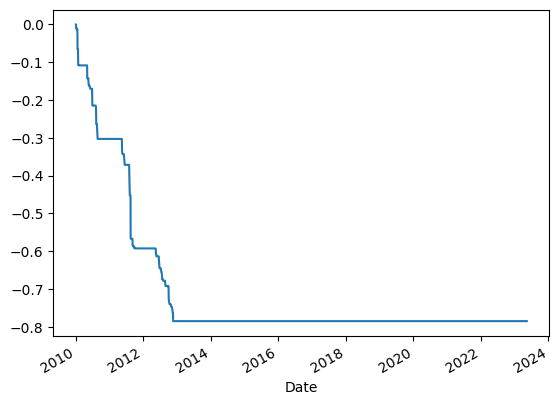

In [242]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()


In [243]:
print(f"Maximum Drawdown is: {mdd[-1]*100} %")

Maximum Drawdown is: -78.52164265505093 %


In [244]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00419446, -0.00930327, ..., -0.01419611,
       -0.01574016, -0.01667233])

In [245]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 1.00419446, 0.99485216, ..., 1.25360762, 1.23387563,
       1.21330405])

In [246]:
print(f"Cumulative return is {cumulative_ret[-1]*100}%")

Cumulative return is 121.3304052241526%


In [247]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.388124
2012-12-31   -0.446817
2013-12-31    0.963509
2014-12-31    0.434239
2015-12-31   -0.350319
2016-12-31    0.253378
2017-12-31    0.415768
2018-12-31   -0.026178
2019-12-31    0.004399
2020-12-31    0.196594
2021-12-31    0.531923
2022-12-31   -0.286700
2023-12-31    0.075549
Freq: A-DEC, Name: Close, dtype: float64

In [248]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.079031
2010-03-31    0.046466
2010-04-30   -0.022201
2010-05-31   -0.114682
                ...   
2023-01-31    0.084481
2023-02-28    0.013041
2023-03-31   -0.005759
2023-04-30    0.012266
2023-05-31   -0.027264
Freq: M, Name: Close, Length: 161, dtype: float64

In [249]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 10.594007361820156%


In [250]:
sharpe_ratio = (avg_yearly_return - 0.05)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 6.203431460266607


In [251]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-04-30   -0.022201
2010-05-31   -0.114682
2010-06-30   -0.059335
2010-08-31   -0.164857
2010-10-31   -0.000713
                ...   
2022-08-31   -0.140162
2022-09-30   -0.132010
2022-12-31   -0.105526
2023-03-31   -0.005759
2023-05-31   -0.027264
Name: Close, Length: 72, dtype: float64

In [252]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.05)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 10.595377558617237
